# Assignment: Data Wrangling
## `! git clone https://github.com/DS3001/wrangling`

**Q1.** Open the "tidy_data.pdf" document in the repo, which is a paper called Tidy Data by Hadley Wickham.

  1. Read the abstract. What is this paper about?
* How to organize data in a standardized format for ease of analysis.
<br />
  2. Read the introduction. What is the "tidy data standard" intended to accomplish?

* To make initial data cleaning easier by using repetitive methods
<br />
  3. Read the intro to section 2. What does this sentence mean: "Like families, tidy datasets are all alike but every messy dataset is messy in its own way."
  What does this sentence mean: "For a given dataset, it’s usually easy to figure out what are observations and what are variables, but it is surprisingly difficult to precisely define variables and observations in general."

* Tidy datasets all have specific frameworks and messy datasets are all missing aspects of such frameworks
* Different analyses of the same dataset evaluate multiple relationships between variables and require different definitions of the values within a table
<br />
  4. Read Section 2.2. How does Wickham define values, variables, and observations?

* Values: numbers or strings
* Variables: all values that measure the same attribute
* Observations: all values measured on the same unit across attributes
<br />
  5. How is "Tidy Data" defined in section 2.3?

* Each variable forms a column
* Each observation forms a row
* Each type of observational unit forms a table
<br />
  6. Read the intro to Section 3 and Section 3.1. What are the 5 most common problems with messy datasets? Why are the data in Table 4 messy? What is "melting" a dataset?

* Column headers are values, not variable names
* Multiple variables are stored in one column
* Variables are stored in both rows and columns
* Multiple types of observational units are stored in the same table
* A single observational unit is stored in multiple tables

 * The data is Table 4 has numbers as headings
* Melting a dataset consists of turning columns into rows
<br />
  7. Why, specifically, is table 11 messy but table 12 tidy and "molten"?

* In table 11, the variables are stored in both the rows and columns (e.g. each day is spread across columns) but in table 12, the days, months, and year are concised into the date column and the tmax and tmin variables are given their own column instead of being contained within one column, "element"
<br />
  8. Read Section 6. What is the "chicken-and-egg" problem with focusing on tidy data? What does Wickham hope happens in the future with further work on the subject of data wrangling?
  
* Want to improve the dataset by using better tidying tools, but innovating such tools is difficult as they must be tested on datasets already tidied by tidying tools


**Q2.** This question provides some practice cleaning variables which have common problems.
1. Numeric variable: For `./data/airbnb_hw.csv`, clean the `Price` variable as well as you can, and explain the choices you make. How many missing values do you end up with? (Hint: What happens to the formatting when a price goes over 999 dollars, say from 675 to 1,112?)
2. Categorical variable: For the `./data/sharks.csv` data covered in the lecture, clean the "Type" variable as well as you can, and explain the choices you make.
3. Dummy variable: For the pretrial data covered in the lecture, clean the `WhetherDefendantWasReleasedPretrial` variable as well as you can, and, in particular, replace missing values with `np.nan`.
4. Missing values, not at random: For the pretrial data covered in the lecture, clean the `ImposedSentenceAllChargeInContactEvent` variable as well as you can, and explain the choices you make. (Hint: Look at the `SentenceTypeAllChargesAtConvictionInContactEvent` variable.)

In [8]:
import pandas as pd
import numpy as np

from google.colab import drive
# drive.mount('/content/gdrive')
df = pd.read_csv("gdrive/My Drive/airbnb_hw.csv", low_memory = False)
print(df.shape)
print(df.dtypes)
print(df.columns[1:5])


(30478, 13)
Host Id                         int64
Host Since                     object
Name                           object
Neighbourhood                  object
Property Type                  object
Review Scores Rating (bin)    float64
Room Type                      object
Zipcode                       float64
Beds                          float64
Number of Records               int64
Number Of Reviews               int64
Price                          object
Review Scores Rating          float64
dtype: object
Index(['Host Since', 'Name', 'Neighbourhood ', 'Property Type'], dtype='object')


0     145
1      37
2      28
3     199
4     549
5     149
6     250
7      90
8     270
9     290
10    170
Name: Price, dtype: object 

['145' '37' '28' '199' '549' '149' '250' '90' '270' '290' '170' '59' '49'
 '68' '285' '75' '100' '150' '700' '125' '175' '40' '89' '95' '99' '499'
 '120' '79' '110' '180' '143' '230' '350' '135' '85' '60' '70' '55' '44'
 '200' '165' '115' '74' '84' '129' '50' '185' '80' '190' '140' '45' '65'
 '225' '600' '109' '1990' '73' '240' '72' '105' '155' '160' '42' '132'
 '117' '295' '280' '159' '107' '69' '239' '220' '399' '130' '375' '585'
 '275' '139' '260' '35' '133' '300' '289' '179' '98' '195' '29' '27' '39'
 '249' '192' '142' '169' '1000' '131' '138' '113' '122' '329' '101' '475'
 '238' '272' '308' '126' '235' '315' '248' '128' '56' '207' '450' '215'
 '210' '385' '445' '136' '247' '118' '77' '76' '92' '198' '205' '299'
 '222' '245' '104' '153' '349' '114' '320' '292' '226' '420' '500' '325'
 '307' '78' '265' '108' '123' '189' '32' '58' '86' '219' '800'

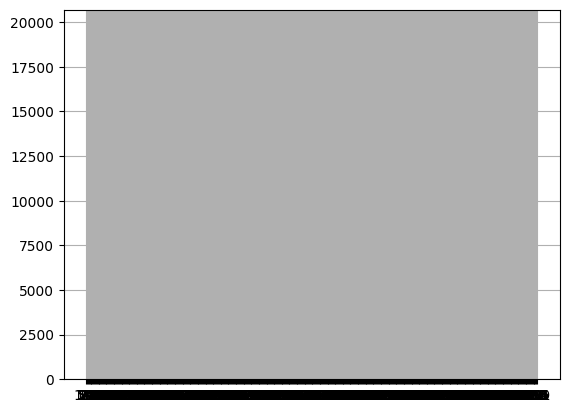

In [20]:
# print(df.iloc[0:5,0:5],'\n') # Show the zero-th to fourth rows/zero-th to seventh columns
print(df.loc[0:10,('Price')],'\n')

var = 'Price'
# formatting over 999 adds a comma when all values should be numerical
df[var] = df[var].str.replace(',','')

print(df[var].unique(),'\n') # 'n' is not listed in the codebook
print(df[var].value_counts(), '\n') #
print(df[var].hist(), '\n')
df.P = pd.to_numeric(df.ID, errors='coerce')


**Q3.** Many important datasets contain a race variable, typically limited to a handful of values often including Black, White, Asian, Latino, and Indigenous. This question looks at data gathering efforts on this variable by the U.S. Federal government.

1. How did the most recent US Census gather data on race?
2. Why do we gather these data? What role do these kinds of data play in politics and society? Why does data quality matter?
3. Please provide a constructive criticism of how the Census was conducted: What was done well? What do you think was missing? How should future large scale surveys be adjusted to best reflect the diversity of the population? Could some of the Census' good practices be adopted more widely to gather richer and more useful data?
4. How did the Census gather data on sex and gender? Please provide a similar constructive criticism of their practices.
5. When it comes to cleaning data, what concerns do you have about protected characteristics like sex, gender, sexual identity, or race? What challenges can you imagine arising when there are missing values? What good or bad practices might people adopt, and why?
6. Suppose someone invented an algorithm to impute values for protected characteristics like race, gender, sex, or sexuality. What kinds of concerns would you have?